<a href="https://colab.research.google.com/github/samlarson94/fitness-data-analysis/blob/main/Data_Analysis_Fitness_Project__Larson2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fundamentals of AIML: Cardio Good Fitness Data Analysis Project**

## **Context**

Cardio Good Fitness is a leading manufacturer of high-quality treadmills. The company offers three main products: the TM195, the TM498, and the TM798, which is their flagship product. With the rising demand for fitness in the market and an increasing number of competitors, Cardio Good Fitness wants to gain a better understanding of its existing customer profiles in order to develop more targeted marketing and product development strategies. They believe this will allow them to meet the needs and preferences of their customers, increase customer satisfaction, and drive revenue growth.

<br>

## **Objective**

In order to gain insights into its customer profiles, Cardio Good Fitness has collected demographic and product usage information for each of its customers. The dataset includes variables such as age, gender, income, and miles run on the treadmill for each of the three products.

Suppose you are hired as a Data Scientist in this company and the Data Science team has shared the data with you. The requirement is to analyze the data and identify patterns in product usage and the key characteristics of customers by conducting exploratory data analysis (EDA) to come up with customer profiles.

The goal is to answer key questions such as:

* What are the key characteristics of customers who purchase each product?
* How does product usage vary by each group?

<br>

## **Data Description**

The data is about customers of the treadmill product(s) of a retail store called Cardio Good Fitness. It contains the following variables-


* Product - The model no. of the treadmill
* Age -  Age of the customer in no of years
* Gender - Gender of the customer
* Education - Education of the customer in no. of years
* Marital Status - Marital status of the customer
* Usage - Avg. number of times the customer wants to use the treadmill every week
* Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)
* Income - Income of the customer
* Miles- Miles that a customer expects to run

### Let us start by importing the required libraries -

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# MountGoogle Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Locate File in File Path
file_path = 'drive/MyDrive/Data Science/Loan_Modelling.csv'# read the data
df = pd.read_csv(file_path)
df.head() #Use head to check to make sure our file is coming in correctly

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
# copying data to another variable to avoid any changes to original data
cardio = df.copy()

In [ ]:
# Check that cardio copy is returning the correct data
cardio.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the product purchased by a customer.

### Checking shape of dataset.

In [ ]:
# Determine Amount of Rows and Columns in Dataset
rows = len(cardio.axes[0])
print(rows)

columns = len(cardio.axes[1])
print(columns)


180
9


#### Observations:
The dataset has (180) rows and (9) columns.

### Checking datatypes of the different columns in the dataset

In [ ]:
# Determine datatypes of different columns in dataset
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


#### Observations:

Below are Columns and their respective datatypes:

*   Product = object
*   Age = integer 64
*   Gender = object
*   Education = integer 64
*   MaritalStatus = object
*   Usage = integer 64
*   Fitness = integer 64
*   Income = integer 64
*   Miles = integer 64

Note that these are Pandas datatypes.





### Converting data with type "object" to "categorical" to reduce memory usage.


In [ ]:
# Converting 'object' datatypes to 'categorical' type to reduce memory usage.
# Note: 'object' datatypes can be thought of as general-purpose columns with mixed data, which can include strings, numbers, and other Python objects. This provides flexibility, but comes at the cost of increased memory usage since each element in the column requires its own memory allocation.
# The 'category' data type is designed for columns with a small amount of unique values. Instead of storing each unique value as a separate object, pandas assigns a unique integer code to each value and stores these codes in an array. This allows us to store this information more efficiently in memory.

for column in cardio.columns:
  # Check if the data type of the column is 'object'
  if cardio[column].dtype == 'object':
      # Change the data type to 'categorical'
      cardio[column] = cardio[column].astype('category')

print("New Datatype Values:")
print(cardio.info())


New Datatype Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.5 KB
None


### Checking for Missing Data

In [ ]:
# Checking for Missing Values in Each Column
bool_check = cardio.isnull().values.any()
print(bool_check)

# Sum of Missing Values by Column
missing_values = cardio.isnull().sum()
print(missing_values, cardio.info())

False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.5 KB
Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64 None


#### Observations: After initial analysis, there are no missing (null) values in this dataset.

### Checking the statistical summary of the data. Which product type has had the highest number of sales?

In [ ]:
# Statistical Summary for Entire Dataset
summary = cardio.describe()
print(summary)

# Statistical Summary by Product Type
products = cardio['Product'].unique()
print(products)

# NOTE: Unique Product Types = 'TM195', 'TM498', 'TM798'

# Loop through Dataframe and Calculate Stats for Each Product Type
product_summary = {}
for product in products:
  # Make seperate filtered_df's for each product type
  filtered_df = df[cardio['Product'] == product]

  # Calculate summary stats for each new product table
  stats = filtered_df.describe()

  # Store summary statistics in the dict
  product_summary[product] = stats

for product, stats in product_summary.items():
    print(f"Summary statistics for Product Type {product}:")
    print(stats)
    print()

              Age   Education       Usage     Fitness         Income  \
count  180.000000  180.000000  180.000000  180.000000     180.000000   
mean    28.788889   15.572222    3.455556    3.311111   53719.577778   
std      6.943498    1.617055    1.084797    0.958869   16506.684226   
min     18.000000   12.000000    2.000000    1.000000   29562.000000   
25%     24.000000   14.000000    3.000000    3.000000   44058.750000   
50%     26.000000   16.000000    3.000000    3.000000   50596.500000   
75%     33.000000   16.000000    4.000000    4.000000   58668.000000   
max     50.000000   21.000000    7.000000    5.000000  104581.000000   

            Miles  
count  180.000000  
mean   103.194444  
std     51.863605  
min     21.000000  
25%     66.000000  
50%     94.000000  
75%    114.750000  
max    360.000000  
['TM195', 'TM498', 'TM798']
Categories (3, object): ['TM195', 'TM498', 'TM798']
Summary statistics for Product Type TM195:
             Age  Education      Usage   Fitness

#### Observations: Based off of this limited dataset and assuming that each entry is a sale, we can compare the count of each model and conclude that the TM195 had the highest amount of sales at 80.

## **Exploratory Data Analysis (EDA)**

### **Univariate Analysis**

### Exploring all variables and providing observations on their distributions.

In [ ]:
# Univariate Analysis

# # Age
# sns.histplot(data=cardio, x='Age', kde=True)
# sns.boxplot(data=cardio, x="Age")

# # Education
# sns.histplot(data=cardio, x='Education')
# sns.boxplot(data=cardio, x="Education")
# sns.countplot(data=cardio, x="Education")

# Marital Status
# sns.countplot(data=cardio, x="MaritalStatus")

# # Usage
# sns.countplot(data=cardio, x="Usage")

# # Fitness
# sns.histplot(data=cardio, x="Fitness")
# sns.boxplot(data=cardio, x="Fitness")
# sns.countplot(data=cardio, x="Fitness")

# # Income
# sns.histplot(data=cardio, x="Income", kde=True)
# sns.boxplot(data=cardio, x="Income")

# # Miles
# sns.histplot(data=cardio, x="Miles", kde=True)
# sns.boxplot(data=cardio, x="Miles")

# # Gender
# sns.countplot(data=cardio, x="Gender")

#### Observations:


Age is slightly skewed to the right. It's boxplot reveals some potential outliers, but since this is an age category and they are within reason we will keep them in the dataset.

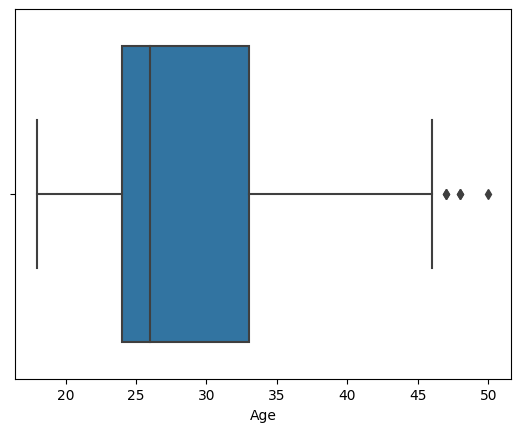

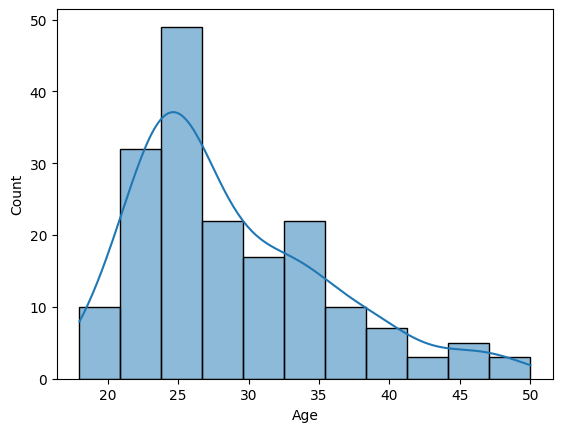

Education is normally distributed. A few outliers are present, but nothing that brings immediate concern. A countplot can be used to show that 16 years of schooling is the most frequent in the dataset, which allows us to assume that most of our customers have some form of college experience.

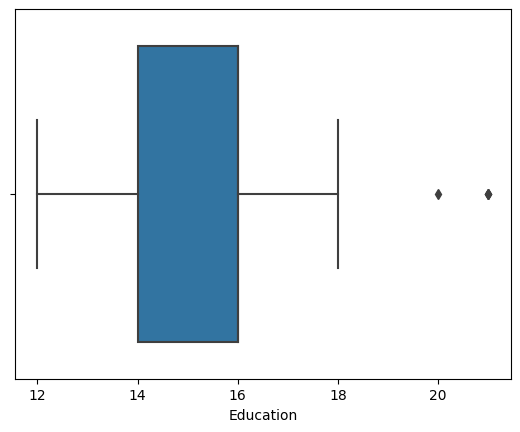

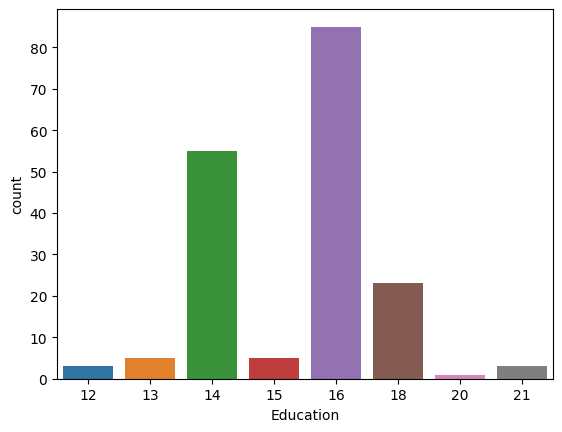

For Usage, we can see that our data is normally distributed with a few outliers on the upper limit.  The majority of customers wish to use their product between 3-4 hours a week.

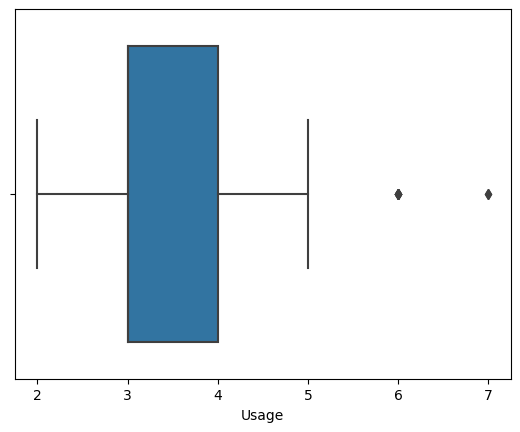

Maritial Status is relatively even between Married and Single customers, with Married customers being slightly more present in this dataset.

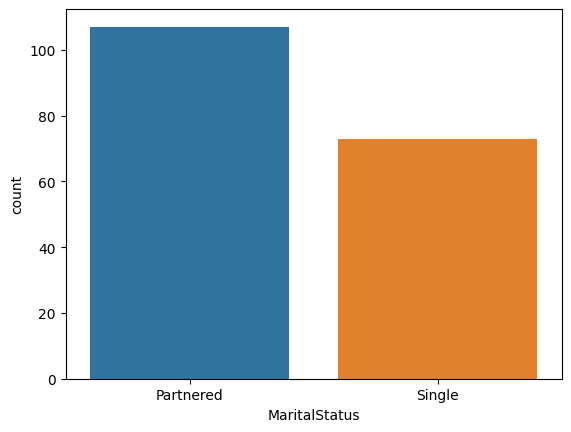

Fitness is normally distributed, with the majority of customers scoring themselves as a "3".

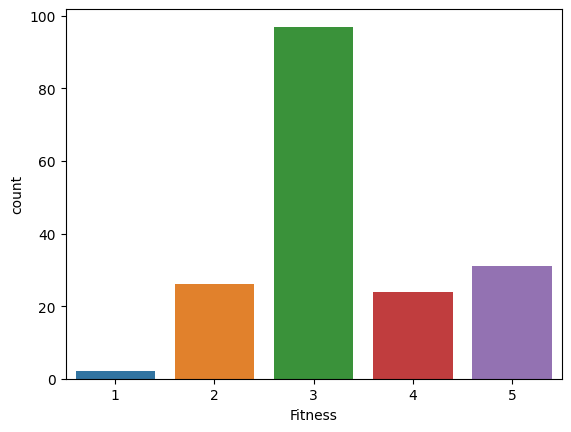

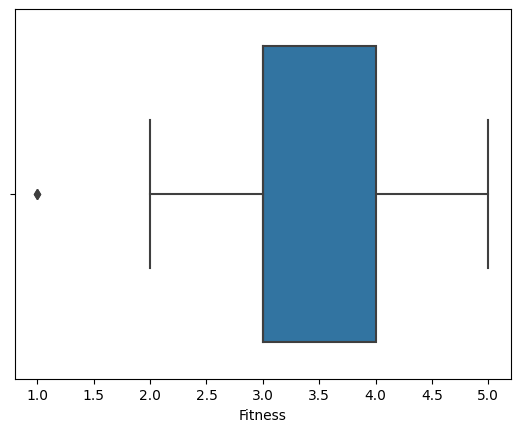

Income has a distribution that is skewed slightly to the right with some larger salaries present in the dataset. The majority of incomes fall between the range of $45,000-$55,000.

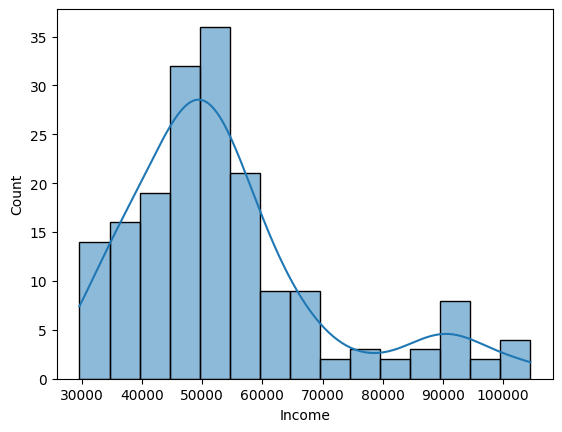

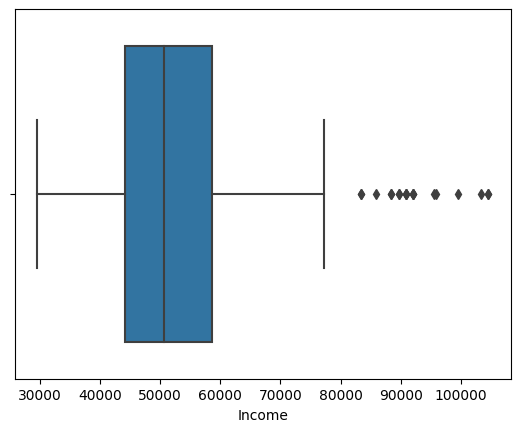

For Miles, we can see that the distribution is skewed slightly to the right - with some very ambitious customers who believe they will run many, many miles. We have some outliers to deal with.

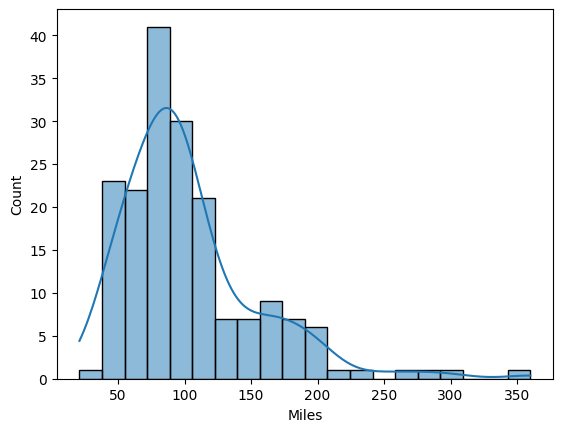

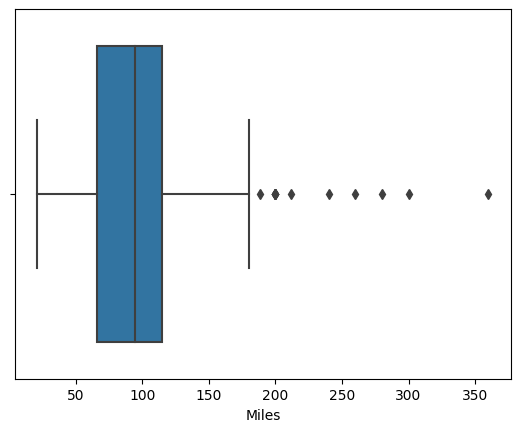

Lastly, we can see that we have slightly more Males purchasing our products than Females in this dataset. It will be interesting to see how this breaks down from product to product.

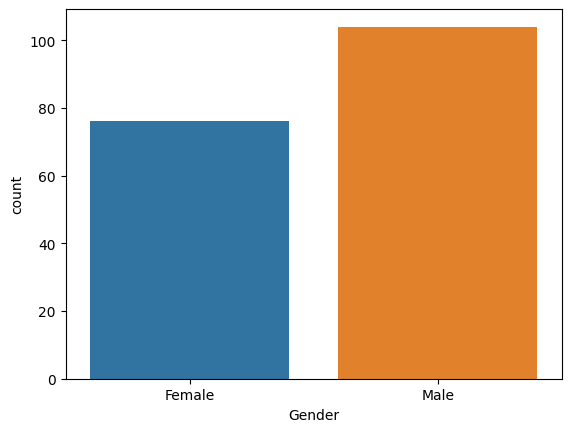


### **Bivariate and Multivariate Analysis**

### Performing bivariate and multivariate analysis to explore relationships between the important variables in the dataset.

<ipython-input-39-c40ebfe81865>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = cardio.corr()


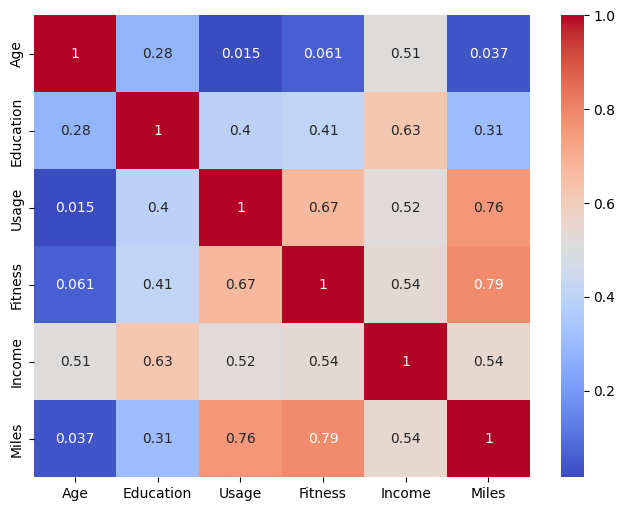

In [ ]:
# Start by Creating a Heat Map to check Correlation btwn variables
correlation_matrix = cardio.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

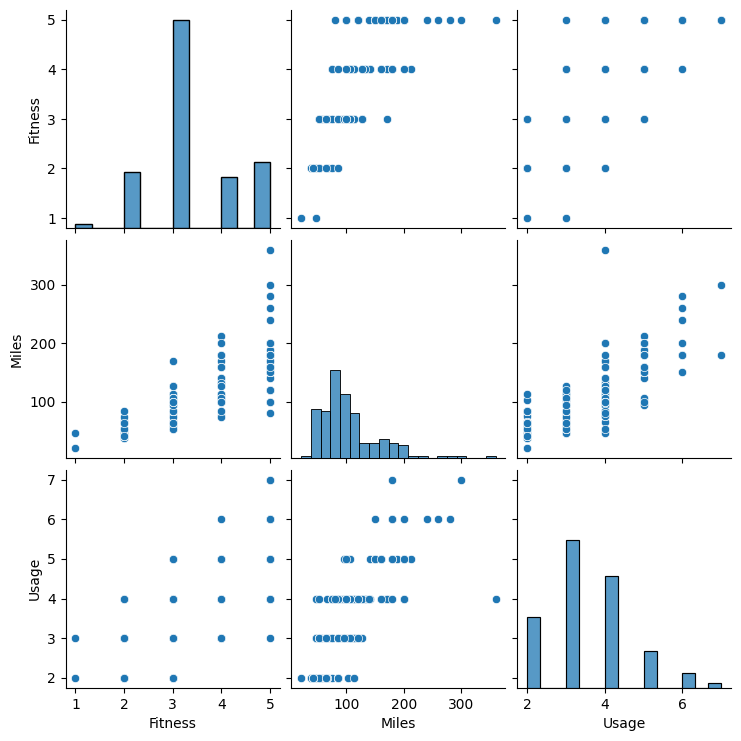

In [ ]:
# Fitness, Miles, and Usage all seem to be highly correlated, let's explore them on a pair plot
highly_correlated = ['Fitness', 'Miles', 'Usage']

sns.pairplot(cardio[highly_correlated])

plt.show()


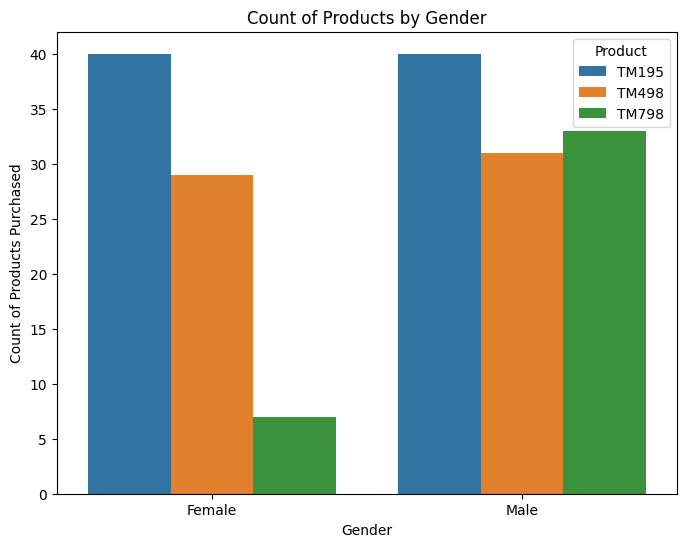

In [ ]:
# Let's focus in on our customer demographics

# Let's look at units sold per gender
count_df = cardio.groupby(['Gender', 'Product']).size().reset_index(name='Count')
plt.figure(figsize=(8, 6))
sns.barplot(data=count_df, x='Gender', y='Count', hue='Product')

plt.xlabel('Gender')
plt.ylabel('Count of Products Purchased')
plt.title('Count of Products by Gender')
plt.show()


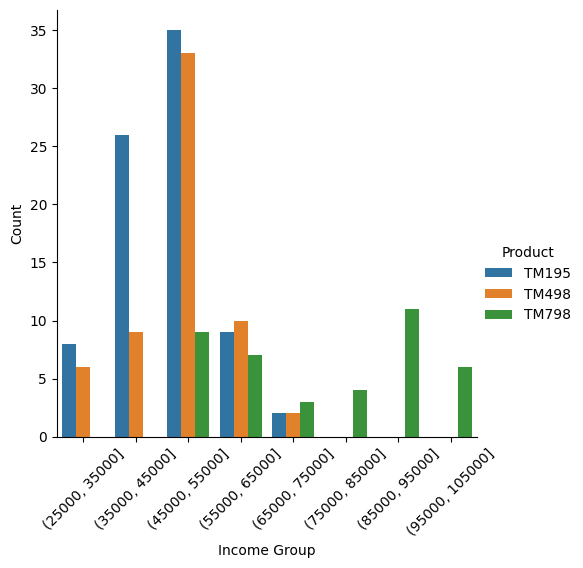

count       180.000000
mean      53719.577778
std       16506.684226
min       29562.000000
25%       44058.750000
50%       50596.500000
75%       58668.000000
max      104581.000000
Name: Income, dtype: float64

In [ ]:
# Let's look at units sold per level of income

cardio['Income'].describe()
# Break Income into following groups for visibility -- $25k, $50k, $75k, $100k
grouped_ranges = [25000, 35000, 45000, 55000, 65000, 75000, 85000, 95000, 105000]

# Add these Grouped Ranges as a seperate Column in our DF
cardio['Income Group'] = pd.cut(cardio['Income'], bins=grouped_ranges)

# Add to new Dataframe and Plot
count_df = cardio.groupby(['Income Group', 'Product']).size().reset_index(name='Count')
sns.catplot(data=count_df, x='Income Group', y='Count', hue='Product', kind='bar')
plt.xticks(rotation=45)
plt.show()

cardio['Income'].describe()

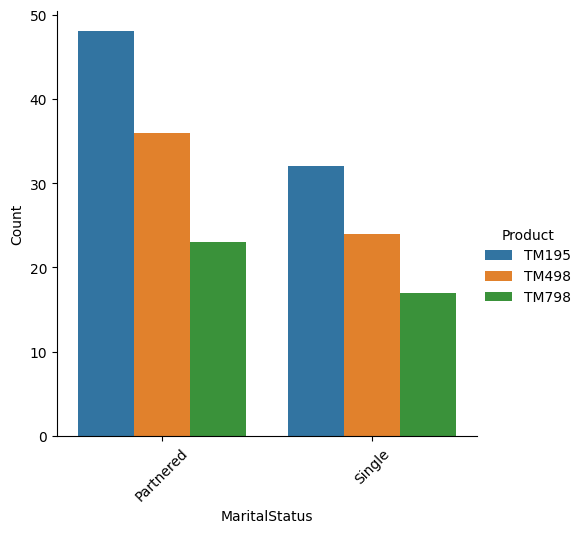

count           180
unique            2
top       Partnered
freq            107
Name: MaritalStatus, dtype: object

In [ ]:
# Let's look at units sold per Marital Status

# Add to new Dataframe and Plot
count_df = cardio.groupby(['MaritalStatus', 'Product']).size().reset_index(name='Count')
sns.catplot(data=count_df, x='MaritalStatus', y='Count', hue='Product', kind='bar')
plt.xticks(rotation=45)
plt.show()

cardio['MaritalStatus'].describe()


### Observations:


*   Fitness, Miles, and Usage all have a positive correlation with each other. Someone with a high level of fitness is likely to use the machines more and clock more miles on them.

*   By comparing the count of Products and Gender, we can see that Males and Females purchase roughly the same amount of Models TM798 and TM498. Interestingly, Males purchase a far greater amount of TM798s than their Female counterparts.  This is something to look into further.

*   By comparing the count of Products and Income, we can see that there is a higher amount of TM798 machines purchased from customers who make more than the mean income of (53719.00). Whereas the TM195 and TM498 models are vastly more popular with customers at or below the mean income of (53,719).

*  The Marital Status of a customer does not seem to have any effect on which product they choose.



### Grouping the data for each product to build customer profiles and summarizing the key characteristics of the customers based on the statistical summary.

In [ ]:
# Create Dict to store different product dataframes
product_dfs = {}

# Iterate through each unique product type
for product_type in cardio['Product'].unique():
  # Filter for each product type
  product_df = cardio[cardio['Product'] == product_type]
  # Store filtered dataframe in dictionary with product_type as key
  product_dfs[product_type] = product_df

# Iterate through the dict and run describe() on each product_type dataframe
for product_type, product_df in product_dfs.items():
    print(f"Statistical Summary for Product Type: {product_type}")
    # Add Counts for Gender and MaritalStatus
    product_summary['Gender Count'] = product_df['Gender'].value_counts()
    product_summary['MaritalStatus Count'] = product_df['MaritalStatus'].value_counts()
    print("Gender Count:")
    print(product_summary['Gender Count'])
    print("Marital Status Count:")
    print(product_summary['MaritalStatus Count'])
    print(product_df.describe())

    print()

Statistical Summary for Product Type: TM195
Gender Count:
Female    40
Male      40
Name: Gender, dtype: int64
Marital Status Count:
Partnered    48
Single       32
Name: MaritalStatus, dtype: int64
             Age  Education      Usage   Fitness       Income       Miles
count  80.000000  80.000000  80.000000  80.00000     80.00000   80.000000
mean   28.550000  15.037500   3.087500   2.96250  46418.02500   82.787500
std     7.221452   1.216383   0.782624   0.66454   9075.78319   28.874102
min    18.000000  12.000000   2.000000   1.00000  29562.00000   38.000000
25%    23.000000  14.000000   3.000000   3.00000  38658.00000   66.000000
50%    26.000000  16.000000   3.000000   3.00000  46617.00000   85.000000
75%    33.000000  16.000000   4.000000   3.00000  53439.00000   94.000000
max    50.000000  18.000000   5.000000   5.00000  68220.00000  188.000000

Statistical Summary for Product Type: TM498
Gender Count:
Male      31
Female    29
Name: Gender, dtype: int64
Marital Status Count:
P

Customer Profiles:

Customer Profile for TM195:
- Their age can range between 18-50, but they are typically around 28 years old.
- They typically have 15 years of education.
- They have an average income around $46,418.02
- There is a even split between Male and Female Customers.

Customer Profile for TM498:
- Their age can range between 19-48, but they are typically around 28 years old.
- They typically have 15 years of education.
- Their average income is slightly higher than the typical TM195 customer's at $48,973.65.
- There is nearly an even split between Male and Female Customers.

Customer Profile for TM798:
- Their age can range between 22-48, but they are typically around 29 years old.
- When compared to TM195 and TM498 customers, they typically have 2 additional years of education with a mean of 17 years.
- This is the most active customer segment, with higher reported fitness levels and usage.  This group also tends to run significantly more miles with a mean of 166.9 miles compared to 87 and 82 average expected miles reported by TM498 and TM195 customers.
- This customer segment has a significantly higher average income level at $75,441.58.
- This customer segment is predominantly male.

In [ ]:
# Exporting as HTML File
from nbconvert import HTMLExporter
import nbformat

# Read Notebook File
with open('/content/drive/MyDrive/Colab Notebooks/FAIML_Project_LearnerNotebook_FullCode_Larson2023.ipynb', 'r') as f:
    notebook = nbformat.read(f, as_version=4)

# Initiate HTML Exporter
html_exporter = HTMLExporter()

# Convert Notebook to html file format
html_output, _ = html_exporter.from_notebook_node(notebook)

# Saving HTML so I can download
with open('/content/Larson_GoodCardioFitness.html', 'w') as x:
    x.write(html_output)



#### **Conclusion:**

*   The dataset contains categorical and quantitative data on three different products, TM195, TM498, and TM798.
*  The TM195 can be considered the best seller out of the three models, and has been shown to appeal the most to a younger demographic with the smallest amount of average income. The TM498 attracts a very similar customer profile.
* The TM798 model attracts the oldest, most-educated, and highest income earners when compared to the customer profiles of the other models.  The TM798 customers also tend to be the most active and use the product the most. From this dataset, we can see that more Males purchase this product than females.

#### **Recommendations:**

*   Considering the customer profile of the TM798 model, I would treat this product as a luxury product.  It attracts the highest earning, most frequent users and therefore may justify a higher price point than its already being sold at. Perhaps look into rebranding and launching a new version of this product at an even higher pricepoint.
*  I would consider dropping either the TM195 or TM498.  Unless there are substantial differences between these two products, I would look into which one is more profitable.  Both product's customer profiles are very similar, and combining these into one product may be more efficient for the business.

